# Tutorial 1: Data Exploration and Data Quality

## Question 1

### Step 1 : Import Iris Flower Dataset

**<font color='red'>Code: Uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the 
       the data frame</font>**

In [1]:
import pandas as pd

data = pd.read_csv('T1Q1_iris.data',header=None)
data.columns = ['sepal length(cm)', 'sepal width(cm)', 'petal length(cm)', 'petal width(cm)', 'class']
data

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Step 2 : For each quantitative attribute, find its mean, standard deviation, minimum,maximum values,
###          covariance and correlation with libraries.

**<font color='red'>Code:</font>** 
    
**<font color='red'>    1)Check data is numeric by using is_numeric_dtype() function</font>**

**<font color='red'>    2)Use mean(), std(),min(), max(),cov(),corr() statistical function </font>** 
    
    

In [2]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' %(col))
        print('\t Mean = %.2f' %data[col].mean())
        print('\t Standard deviation = %.2f' %data[col].std())
        print('\t Minimum = %.2f' %data[col].min())
        print('\t Maximum = %.2f' %data[col].max())
    

sepal length(cm):
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width(cm):
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length(cm):
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width(cm):
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [3]:
print("\nCovariance:")
data.cov()


Covariance:


,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
sepal length(cm),0.685694,-0.039268,1.273682,0.516904
sepal width(cm),-0.039268,0.188004,-0.321713,-0.117981
petal length(cm),1.273682,-0.321713,3.113179,1.296387
petal width(cm),0.516904,-0.117981,1.296387,0.582414


In [4]:
print("\nCorrelation:")
data.corr()


Correlation:


,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
sepal length(cm),1.000000,-0.109369,0.871754,0.817954
sepal width(cm),-0.109369,1.000000,-0.420516,-0.356544
petal length(cm),0.871754,-0.420516,1.000000,0.962757
petal width(cm),0.817954,-0.356544,0.962757,1.000000


### Step 3 : For each quantitative attribute, find its mean, standard deviation, minimum,maximum values,
###          covariance and correlation without libraries.

**<font color='red'>Code:Mean</font>** 

In [5]:
from typing import List

def mean(xs: List[float]) -> float:
    meanxs=sum(xs)/len(xs)
    return meanxs

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' %(col))
        print("\t\tMean=%0.2f"%mean(data[col]))

sepal length(cm):
		Mean=5.84
sepal width(cm):
		Mean=3.05
petal length(cm):
		Mean=3.76
petal width(cm):
		Mean=1.20


**<font color='red'>Code:Standard deviation</font>** 

In [6]:
from typing import List
import math

Vector=List[float]

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    sigma= math.sqrt(variance(xs))
    print('\t\tstandard deviation sigma=%0.2f' %sigma)
    return sigma

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' %(col))
        print("\t\tMean=%0.2f"%mean(data[col]))
        standard_deviation(data[col])
        

sepal length(cm):
		Mean=5.84
		standard deviation sigma=0.83
sepal width(cm):
		Mean=3.05
		standard deviation sigma=0.43
petal length(cm):
		Mean=3.76
		standard deviation sigma=1.76
petal width(cm):
		Mean=1.20
		standard deviation sigma=0.76


**<font color='red'>Code:Min and Max</font>** 

In [7]:
def data_range(xs: List[float]) -> float:
    print('\t\tMinimum=%0.2f'%min(xs))
    print('\t\tMaximium=%0.2f'%max(xs))
    return max(xs), min(xs)

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' %(col))
        print("\t\tMean=%0.2f"%mean(data[col]))
        standard_deviation(data[col])
        data_range(data[col])

sepal length(cm):
		Mean=5.84
		standard deviation sigma=0.83
		Minimum=4.30
		Maximium=7.90
sepal width(cm):
		Mean=3.05
		standard deviation sigma=0.43
		Minimum=2.00
		Maximium=4.40
petal length(cm):
		Mean=3.76
		standard deviation sigma=1.76
		Minimum=1.00
		Maximium=6.90
petal width(cm):
		Mean=1.20
		standard deviation sigma=0.76
		Minimum=0.10
		Maximium=2.50


**<font color='red'>Code:Covariance</font>** 

In [8]:
def covariance(xs:List[Vector],ys:List[float])->float:
    return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('Covariance between %s:' %(col))
        for col1 in data.columns:
            if is_numeric_dtype(data[col1]):
                print('\tand %s:' %(col1))
                print('\t\t%s' %covariance(data[col],data[col1]))



Covariance between sepal length(cm):
	and sepal length(cm):
		0.6856935123042505
	and sepal width(cm):
		-0.03926845637583892
	and petal length(cm):
		1.2736823266219242
	and petal width(cm):
		0.5169038031319912
Covariance between sepal width(cm):
	and sepal length(cm):
		-0.03926845637583892
	and sepal width(cm):
		0.18800402684563763
	and petal length(cm):
		-0.32171275167785246
	and petal width(cm):
		-0.11798120805369122
Covariance between petal length(cm):
	and sepal length(cm):
		1.2736823266219242
	and sepal width(cm):
		-0.32171275167785246
	and petal length(cm):
		3.1131794183445156
	and petal width(cm):
		1.2963874720357946
Covariance between petal width(cm):
	and sepal length(cm):
		0.5169038031319912
	and sepal width(cm):
		-0.11798120805369122
	and petal length(cm):
		1.2963874720357946
	and petal width(cm):
		0.5824143176733784


**<font color='red'>Code:Correlation</font>** 

In [9]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('Correlation between %s:' %(col))
        for col1 in data.columns:
            if is_numeric_dtype(data[col1]):
                print('\t and %s:' %(col1))
                print('\t\tcorrelation = %s' %correlation(data[col],data[col1]))


Correlation between sepal length(cm):
	 and sepal length(cm):
		standard deviation sigma=0.83
		standard deviation sigma=0.83
		correlation = 1.0
	 and sepal width(cm):
		standard deviation sigma=0.83
		standard deviation sigma=0.43
		correlation = -0.10936924995064935
	 and petal length(cm):
		standard deviation sigma=0.83
		standard deviation sigma=1.76
		correlation = 0.8717541573048719
	 and petal width(cm):
		standard deviation sigma=0.83
		standard deviation sigma=0.76
		correlation = 0.8179536333691637
Correlation between sepal width(cm):
	 and sepal length(cm):
		standard deviation sigma=0.43
		standard deviation sigma=0.83
		correlation = -0.10936924995064935
	 and sepal width(cm):
		standard deviation sigma=0.43
		standard deviation sigma=0.43
		correlation = 1.0
	 and petal length(cm):
		standard deviation sigma=0.43
		standard deviation sigma=1.76
		correlation = -0.42051609640115484
	 and petal width(cm):
		standard deviation sigma=0.43
		standard deviation sigma=0.76
		co

### Step 4 : Data Visualization

**<font color='red'>Code:</font>**

**<font color='red'>    a)Histogram for the petal length attribute by discretizing it into 20 separate bins</font>**
**<font color='red'>and counting the frequency for each bin.</font>**

<AxesSubplot:>

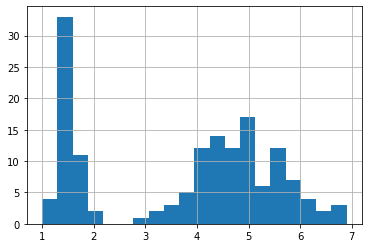

In [10]:
%matplotlib inline

data['petal length(cm)'].hist(bins=20)

**<font color='red'>    b)Boxplot to show the distribution of values for each attribute.</font>**

<AxesSubplot:>

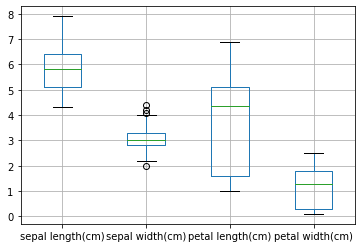

In [11]:
data.boxplot()

**<font color='red'>    c)Scatterplot to visualize the joint distribution between pairs of attributes.</font>**

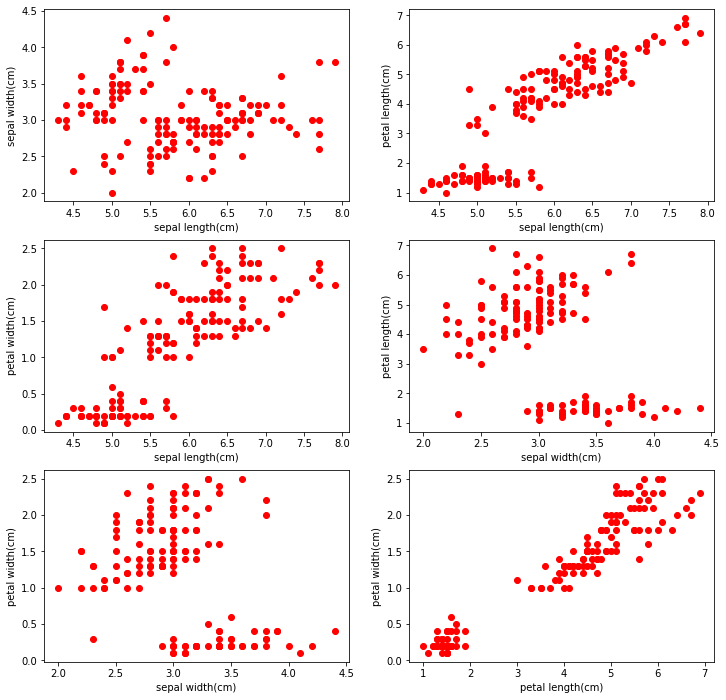

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**<font color='red'>    d)Parallel coordinates: used to display all the data points simultaneously. 
Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one 
other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as 
a point. The distribution of values for each class can be identified in a separate color.</font>**

<AxesSubplot:>

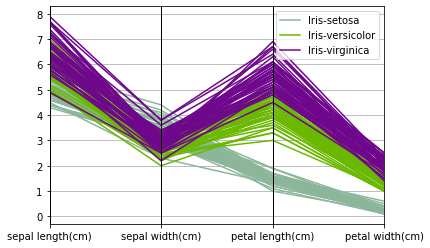

In [13]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')